In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sounddevice
!pip install scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Розовый шум

In [2]:
duration = 5  # Продолжительность в секундах
sample_rate = 44100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)

In [5]:
# генерим белый шум
white_noise = np.random.normal(loc = 0, scale = 1, size = num_samples)

# генерим розовый шум
fft = np.fft.rfft(white_noise)
freqs = np.fft.rfftfreq(num_samples, d=1/sample_rate)
amps = np.abs(fft)
coefs = np.zeros(freqs.shape)
coefs[1:] = 1 / np.sqrt(freqs[1:])
pink_amps = amps * coefs
pink_fft = pink_amps * np.exp(1j * np.angle(fft))
pink_noise = np.real(np.fft.irfft(pink_fft))

print(pink_noise)


[-0.03041726 -0.02096595 -0.01271599 ... -0.00925291 -0.00768533
 -0.02207839]


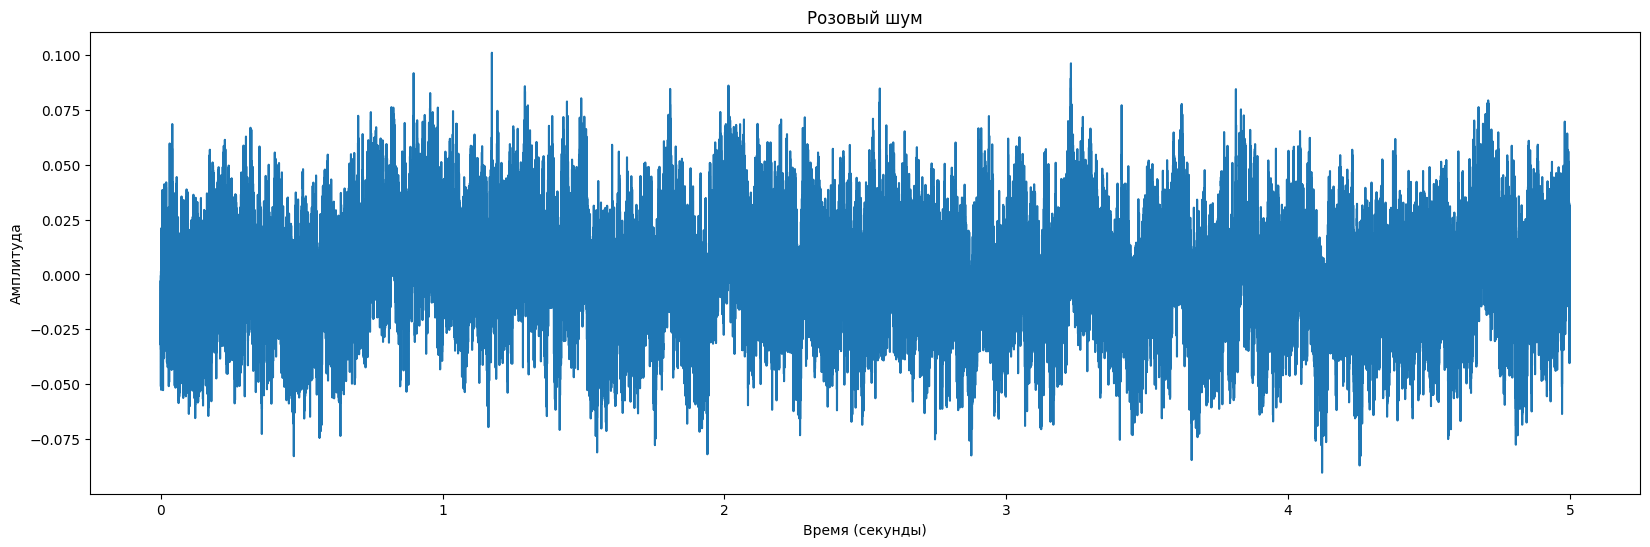

In [6]:
# отрисовываем, что получилось 
# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion). 
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(pink_noise)) 

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))  

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

2) Черный шум

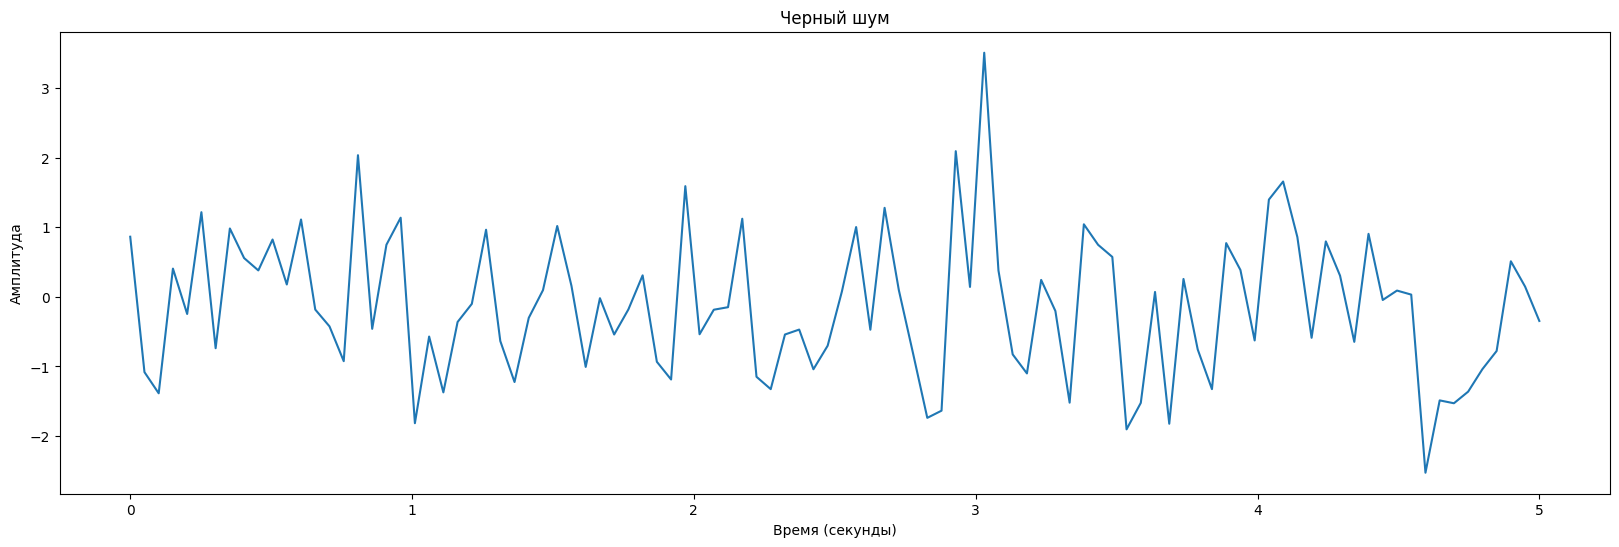

In [7]:
# количество элементов в записи сигнала
num_samples = int(duration * sample_rate)
freq1 = 20000
freq2 = 25000

# Частоты, на которых будем генерировать
num_frequencies = 100  # Количество случайных частот
frequencies = np.linspace(freq1, freq2, num_frequencies) # лист с частотами

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

amplitudes = np.random.normal(0, 1, num_frequencies)  # опять сгенерировали белый гауссовский шум
    
black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
    
for i in range(num_frequencies):
        black_noise += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * time_axis)
    

# Визуализация
time_axis = np.linspace(0, duration, len(amplitudes))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, amplitudes)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

3. Генерация сигнала

In [8]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

num_points = duration*sample_rate  # количество точек

time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд

white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум

values = 10*np.sin(time_points*np.pi) # вычисляем амплитуды сигнала

values_noise = values + white_noise_base # зашумляем сигнал

/tmp/ipykernel_38383/3043892488.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


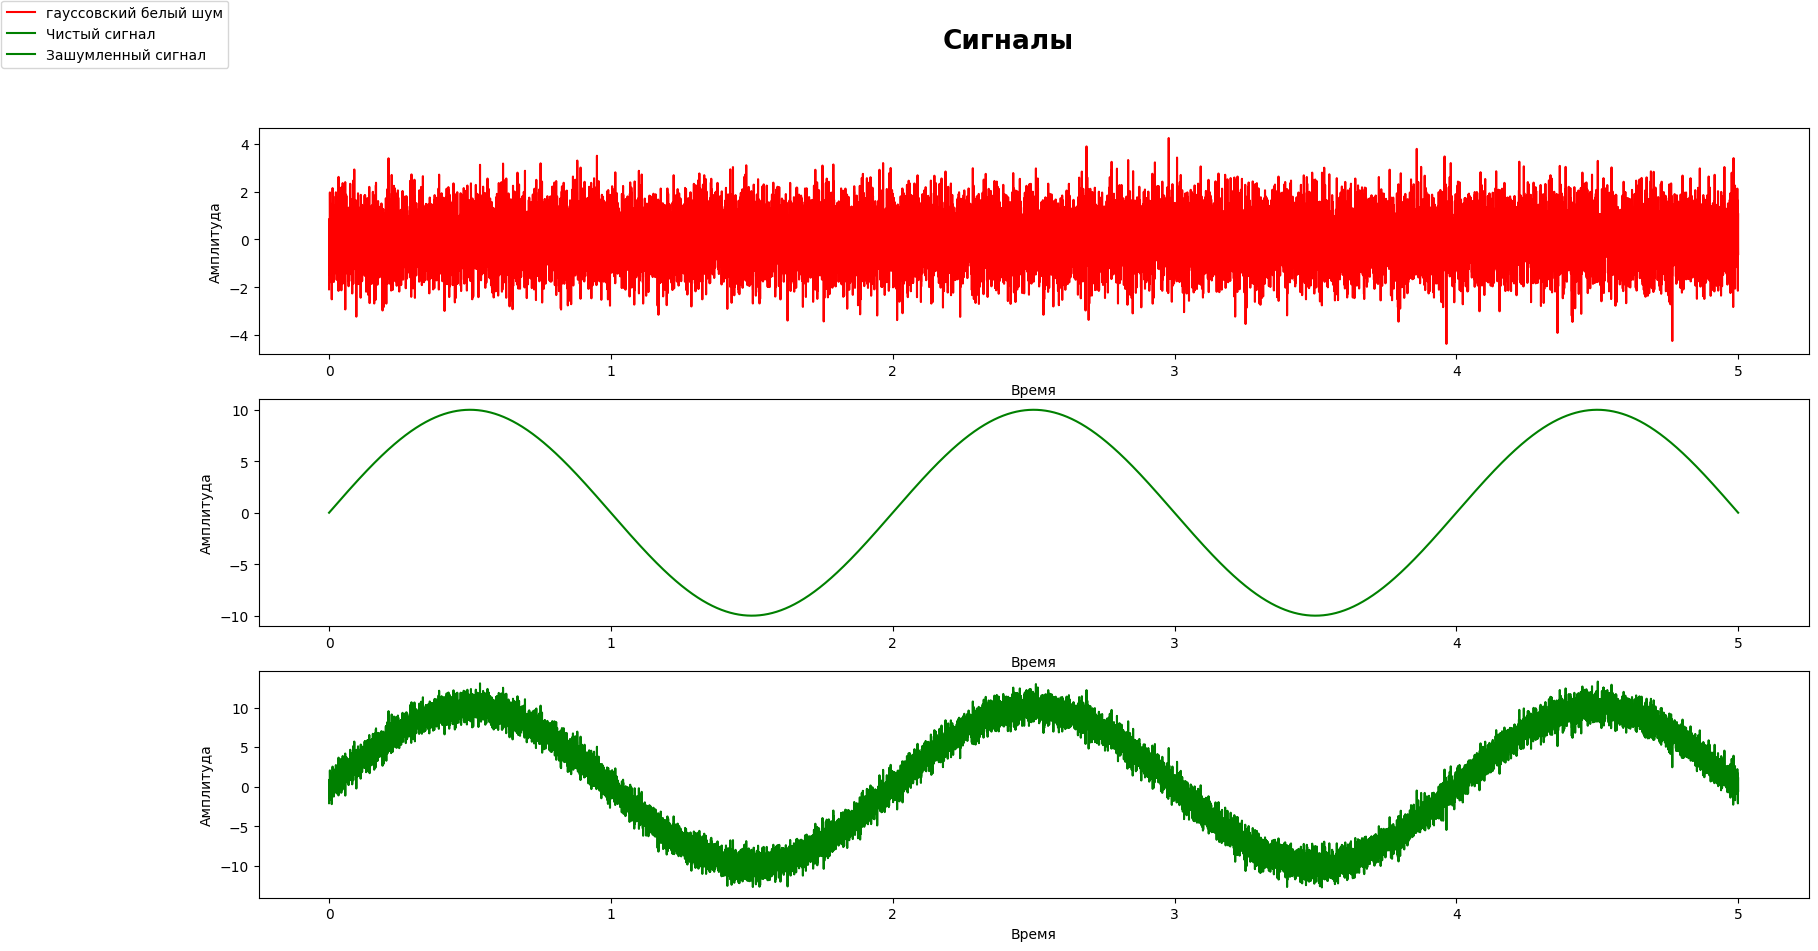

In [9]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)

